In [1]:
import scipy.io
data = scipy.io.loadmat('../../data/url.mat')

**create list for labels and data, where one entry is the data for the day with this index**

In [2]:
import numpy as np

num_of_days = 120
X, Y = [], []

for i in range(num_of_days):
    day_data = data["Day" + str(i)]
    X.append(day_data[0][0][0])
    Y.append(day_data[0][0][1])

**continous learn classifier**

In [3]:
# incremental learns classifier (must have partial_fit() function)
# returns an array of cumulative error rates for each day
def learn_interval(clf):
    
    error_rates = []
    num_of_days = 120
    err = 0
    
    for curr_day in range(num_of_days): # looping through days
    
        if (curr_day != 45):
            X_curr_day = X[curr_day]
            Y_curr_day = Y[curr_day]
        
            if (curr_day > 0):
                Y_preds = clf.predict(X_curr_day)
            
                for k in range(len(Y_preds)):
                    if(Y_preds[k] != Y_curr_day[k]):
                        err = err + 1
        
            clf.partial_fit(X_curr_day, Y_curr_day.ravel(), classes=list(range(2))) # Continous fitting of urls and label
            
            error_rates.append(err / X_curr_day.shape[0])
            err = 0
    return error_rates

In [4]:
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state = 123)

error_rates = learn_interval(clf)

cnt = 0
for x in error_rates:    
    print("Error-rate Day {}   : {}".format(cnt, x))
    cnt = cnt + 1

Error-rate Day 0   : 0.0
Error-rate Day 1   : 0.0306
Error-rate Day 2   : 0.0299
Error-rate Day 3   : 0.0256
Error-rate Day 4   : 0.02635
Error-rate Day 5   : 0.02245
Error-rate Day 6   : 0.02085
Error-rate Day 7   : 0.0287
Error-rate Day 8   : 0.02985
Error-rate Day 9   : 0.0713
Error-rate Day 10   : 0.07985
Error-rate Day 11   : 0.02195
Error-rate Day 12   : 0.019
Error-rate Day 13   : 0.02035
Error-rate Day 14   : 0.0184
Error-rate Day 15   : 0.0206
Error-rate Day 16   : 0.02215
Error-rate Day 17   : 0.01715
Error-rate Day 18   : 0.0201
Error-rate Day 19   : 0.0277
Error-rate Day 20   : 0.0198
Error-rate Day 21   : 0.02565
Error-rate Day 22   : 0.02105
Error-rate Day 23   : 0.0195
Error-rate Day 24   : 0.0231
Error-rate Day 25   : 0.03375
Error-rate Day 26   : 0.03065
Error-rate Day 27   : 0.03765
Error-rate Day 28   : 0.0312
Error-rate Day 29   : 0.0383
Error-rate Day 30   : 0.0266
Error-rate Day 31   : 0.0349
Error-rate Day 32   : 0.0542
Error-rate Day 33   : 0.02345
Error-rate Da

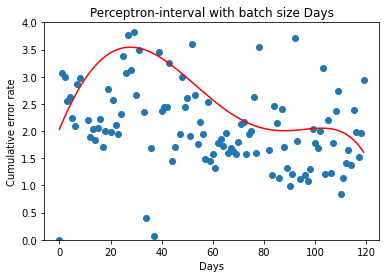

In [5]:
import matplotlib.pyplot as plt

def plot5degree(error_rates, batch_size, scatter = False):
    
    # Set up the day_indexes with the missing 45th day in mind
    y_indexes = np.arange(0, 120)
    y_indexes = np.delete(y_indexes, 46)
    
    y = np.array(error_rates)
    y = y * 100
    x = y_indexes

    # create polynomial equation and calculate line
    theta = np.polyfit(x, y, 5)
    y_line = theta[5] + theta[4] * pow(x, 1) + theta[3] * pow(x, 2) + theta[2] * pow(x, 3) + theta[1] * pow(x, 4) + theta[0] * pow(x, 5)

    if (scatter):
        plt.scatter(x, y)
    
    plt.plot(x, y_line, 'r')
    plt.title('Perceptron-interval with batch size {}'.format(batch_size))
    plt.xlabel('Days')
    plt.ylabel('Cumulative error rate')
    plt.ylim([0,4])
    plt.show()

plot5degree(error_rates, "Days", True)